# Review of Correlation

Recall from the previous [section](https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week3/goodness.html) that the **correlation**, $r$, between two time series, $x(t)$ and $y(t)$ gives a measure of how well the two time series vary linearly together (or don't).

We derived the correlation from the **coefficient of determination** between $x(t)$ and $y(t)$ (where $x$ is the predictor and $y$ is the predictand) by quantifying how well the variance explained by the linear relationship between $x(t)$ and $y(t)$ accounts for the total the variance in $y$:

$$
\begin{align}
r^2 & = \text{coefficient of determination}\\
& = \frac{\text{explained variance}}{\text{total variance}}\\
& = \frac{S_{\hat{y}\hat{y}}}{S_{yy}}\\
& \\
& \text{Plugging in the expression for $\hat{y}(t)$ and rearranging things, we get ...}\\
& \\
& = \frac{(\overline{x^{\prime}y^{\prime}})^2}{\overline{{x^\prime}^2}\overline{{y^\prime}^2}}
\end{align}
$$

and the correlation coefficient is simply the square-root of $r^2$,

$$
\begin{align}
r & = \pm\sqrt{r^2}\\
& = \frac{\overline{x^{\prime}y^{\prime}}}{\sigma_x\sigma_y}
\end{align}
$$

The key characteristics of these parameters are:

**$r^2$, the coefficient of determination (aka "r-squared"):**

- is the fraction of variance explained by the linear least-squares fit between the two variables
- always lies between 0 and 1

**r, the correlation coefficient:**

- varies between -1 and 1
- indicates the sign of the relationship between the two variables

Now, we will discuss techniques for testing the **statistical significance of correlations**. We will denote the sample correlation as $r$ and the theoretical true value as $\rho$. 

## Sampling Distributions of $r$

Recall that when we discussed the Central Limit Theorem, the key result of that theorem was that the sampling distribution of sample means was normally distributed. This allowed us to then use the power of the $z$-statistic to test statistical hypotheses associated with the sample mean.

For the case when $\rho$ = 0 and $N$ is large, the sampling distribution of $r$ is normally distributed and we can make use of a test statistic that is analogous to the $z$-statistic. But when $\rho \neq$ 0, then the sampling distribution becomes skewed and we have to use a *transformation* to establish statistical significance (more on that later).

First, let's just take a look at the sampling distributions of $r$ for different values of $\rho$. To do this, we will generate some synthetic data. 

### When $\rho$ = 0:

For the case when $\rho$ = 0, we will generate two random time series. These should be uncorrelated with one another for large $N$.

In [1]:
# Generate two time series of random data (50,000 data points each)
import numpy as np
import scipy.stats as st

x = np.random.random(50000)
y = np.random.random(50000)

rho = st.pearsonr(x,y)
print(rho[0])

-0.000748175157872785


We see that we get a near-zero value of the correlation coeffiecient ($\rho$) between our random time series $x$ and $y$. Now, let's take samples of size $N$ = 50 each of $x$ and $y$ and compute the sample correlation coefficient, $r$. We will do this 50,000 times. You can click on the "Live Code" button to change this number and see how the PDF changes.

In [2]:
# Calculate sample correlations
N = 100 # sample size
r = []
Ns = 50000 # sampling rate

# calculate correlation 50,000 times for samples of size N
for i in range(Ns):
    r.append(st.pearsonr(np.random.choice(x,N), np.random.choice(y,N))[0])

Now, let's plot the distribution of these sample correlations.

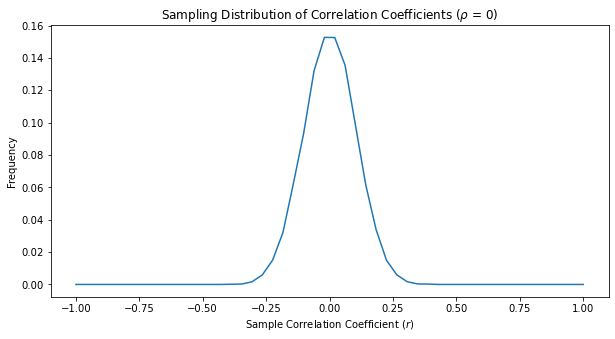

In [3]:
from matplotlib import pyplot as plt

# calculate histogram
bins = np.linspace(-1,1,51)
hcorr0 = np.histogram(r,bins)

# xbins for plotting
xbins = np.linspace(-1,1,50)

# plot distribution
plt.figure(figsize=(10,5))
plt.plot(xbins,hcorr0[0]/Ns) # convert counts to frequency
plt.xlabel("Sample Correlation Coefficient ($r$)")
plt.ylabel("Frequency")
plt.title(r"Sampling Distribution of Correlation Coefficients ($\rho$ = 0)")
plt.show()

So, we see that we get a distribution of sampling correlation coefficients that looks quite *normal*.

### When $\rho \neq$ 0:

Now, let's look at an example when we know the $\rho \neq$ 0. We are going to pick a very idealized case, but there may often be situations where a particular theoretical relationship indicates a non-zero population correlation.

We are going to construct a set of time series to illustrate how the distribution of sample correlation coefficients changes as $\rho$ changes. We will generate time series such that we will obtain population correlations of 0.1, 0.4 0.7 and 0.9. I am hiding the code used to generate these time series, but we will come back to this in an upcoming section on red-noise processes.

In [4]:
# Generate Red Noise Time Series: x[n] = a*x[n-1] + b*noise

# Define the time series length
t = np.arange(0,10000,1.) # time

# Define a vector of different autocorrelations, a
auto_vec = np.array([0.1, 0.4, 0.7, 0.9]) 

# initialize an empty array for x
x = np.empty((np.size(t),len(auto_vec)))

# loop over a
for ia,a in enumerate(auto_vec):

    b = np.sqrt(1. - a**2)
    x[0,ia] = np.random.normal(0.,1.,size=1)
    
    # loop over t
    for it,tval in enumerate(t[1:]):
        #generate x as a function of t for each value of a
        x[it+1,ia] = a*x[it,ia] + b*np.random.normal(size=1) #this is equivalent to the red noise equation above
        
    x[:,ia] = x[:,ia]/np.maximum(np.abs(np.min(x[:,ia])),np.max(x[:,ia])) #normalize by the largest absolute value

In order to generate distributions of the **sampling** correlation coefficients, we will add a bit of noise to the time series to represent the variability that we would likely see in nature. 

Next, we will compute the correlation between samples of these noisy time series 50,000 times to obtain distributions of the sampling correlation coefficient for each value of the population correlation (0.1,0.4,0.7 and 0.9). I have hidden the code again - the *key message* is in the histograms below. 

In [5]:
# Calculate sample correlations
N = 100 # sample size
Ns = 50000 # sampling rate
noise = 0.1*np.random.rand(N)
r = np.zeros((4,Ns))

# loop over values of population correlation
for j in range(4):
    # calculate correlation 50,000 times for samples of size N
    for i in range(Ns):
        start = np.random.randint(0,9000)
        r[j,i] = st.pearsonr(x[start:start+N,j]+noise, x[start+1:start+N+1,j]+noise)[0]

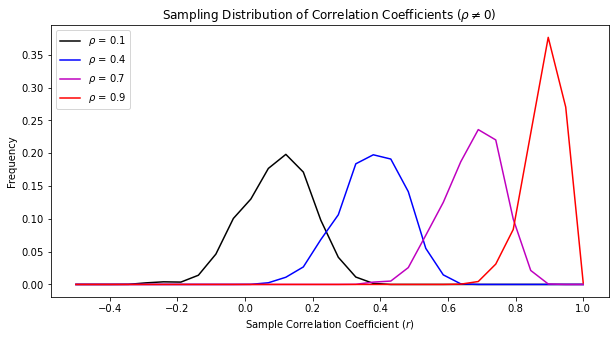

In [6]:
from matplotlib import pyplot as plt

# calculate histogram
bins = np.linspace(-0.5,1,31)
hcorr = np.zeros((4,len(bins)-1))

# loop over values of population correlation
for j in range(4):
    hcorr[j,:],bins = np.histogram(r[j,:],bins)

# xbins for plotting
xbins = np.linspace(-0.5,1,30)

# plot distribution
c = ['k','b','m','r'] # list of colours
labl = [r'$\rho$ = 0.1', r'$\rho$ = 0.4',r'$\rho$ = 0.7',r'$\rho$ = 0.9']

plt.figure(figsize=(10,5))

# loop over values of population correlation
for j in range(4):
    plt.plot(xbins,hcorr[j,:]/Ns,color=c[j],label = labl[j]) # convert counts to frequency
plt.xlabel("Sample Correlation Coefficient ($r$)")
plt.ylabel("Frequency")
plt.title(r'Sampling Distribution of Correlation Coefficients ($\rho \neq$0)')
plt.legend(loc='upper left')
plt.show()

We see that when we have a population correlation coefficient that is non-zero, we obtain sampling distributions that become more and more skewed as $\rho$ increases. Thus, when $\rho \neq$ 0, we cannot use a test statistic that is analogous to the $z$-statistic.

Now, we will take a look at testing statistical significance for the above two cases: $\rho$ = 0 and $\rho \neq$ 0.